

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W6/W6P4.ipynb)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa import stattools
import os

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W6/aluminium_prices.csv"
  res = requests.get(url, allow_redirects=True)
  with open('aluminium_prices.csv','wb') as file:
    file.write(res.content)

download_data()  

In [ ]:
os.listdir()

['.config', 'aluminium_prices.csv', 'sample_data']

In [ ]:
data = pd.read_csv('aluminium_prices.csv',  on_bad_lines='skip')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 22, 2022","2,528.00","2,509.00","2,528.00","2,464.00",-,-0.22%
1,"Jun 21, 2022","2,533.50","2,526.00","2,530.00","2,526.00",-,0.26%
2,"Jun 20, 2022","2,527.00","2,488.00","2,482.00","2,481.00",21.89K,1.16%
3,"Jun 17, 2022","2,498.00","2,500.00","2,500.00","2,500.00",40.74K,-0.26%
4,"Jun 16, 2022","2,504.50","2,535.00","2,529.00","2,525.00",56.34K,-3.39%
...,...,...,...,...,...,...,...
2023,"Jun 20, 2014","1,888.50","1,888.50","1,888.50","1,888.50",18.51K,-0.11%
2024,"Jun 19, 2014","1,890.50","1,890.50","1,890.50","1,890.50",26.66K,0.85%
2025,"Jun 18, 2014","1,874.50","1,874.50","1,874.50","1,874.50",26.12K,1.21%
2026,"Jun 17, 2014","1,852.00","1,852.00","1,852.00","1,852.00",45.55K,0.64%


In [ ]:
data = data["Open"]

In [ ]:
def parse(A: pd.Series):  ### we do some operations here, try to understand what we are doing here
  for i, s in enumerate(A):
    try:
      A[i] = s.replace(",", "")     ### in strings we replace , by . to convert the data frame to numeric.
    except Exception as a:
      print(a, i)
  A = pd.to_numeric(A)
  return A

In [ ]:
data = parse(data)

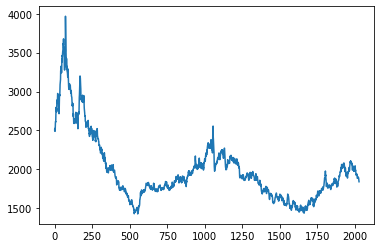

In [ ]:
plt.plot(data)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(data)  ####apperantly this series has a unit root

(-2.436399643817222,
 0.131725265334114,
 24,
 2003,
 {'1%': -3.4336189466940414,
  '5%': -2.8629840458358933,
  '10%': -2.5675387480760885},
 19039.388562971115)

In [ ]:
diff_dat = data.diff()[1:]
adfuller(diff_dat)  #### first differencing saves the day!

(-8.360114287964024,
 2.838596335455584e-13,
 23,
 2003,
 {'1%': -3.4336189466940414,
  '5%': -2.8629840458358933,
  '10%': -2.5675387480760885},
 19030.776694021606)

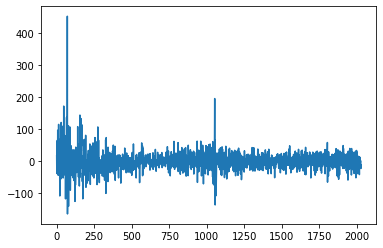

In [ ]:
plt.plot(diff_dat)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
mod = ARIMA(data, order = (2,1,2))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2028
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9686.661
Date:                Sat, 15 Oct 2022   AIC                          19383.322
Time:                        13:57:13   BIC                          19411.394
Sample:                             0   HQIC                         19393.622
                               - 2028                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4337      0.126      3.450      0.001       0.187       0.680
ar.L2         -0.1627      0.144     -1.130      0.258      -0.445       0.120
ma.L1         -0.4499      0.123     -3.646      0.000      -0.692      -0.208
ma.L2          0.2349      0.144      1.636      0.102      -0.047       0.516
sigma2       829.8665      7.108    116.759      0.000     815.936     843.797
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            100718.28
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             2.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

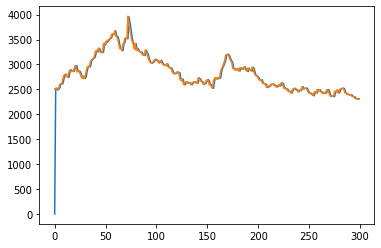

In [ ]:
plt.plot(res.predict()[:300])
plt.plot(data[:300])

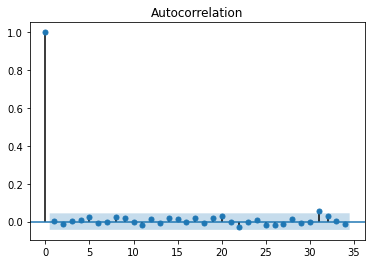

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(res.resid);

In [ ]:
statsmodels.stats.diagnostic.acorr_ljungbox(res.resid, return_df = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.056313,0.812421
2,0.319957,0.852162
3,0.328078,0.954664
4,0.565964,0.966770
5,1.702770,0.888551
6,1.828080,0.934811
7,1.829868,0.968654
8,2.862598,0.942682
9,3.546793,0.938637
10,3.559688,0.965033


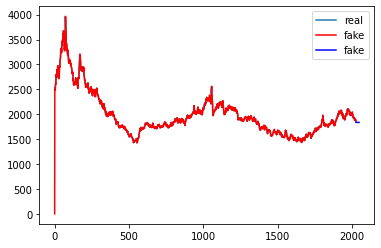

In [ ]:
plt.plot(data, label = "real");
plt.plot(res.predict(), color = "r", label = "fake");
plt.plot(res.forecast(20), color = "b", label = "fake");
plt.legend()
plt.show()